In [1]:
%load_ext autoreload
%autoreload 2

In [60]:
import matplotlib.pyplot as plt
from formulas import ClientData, calculate_monthly_passive_income, create_capital_lifecycle_table

In [55]:
client_data = ClientData(
    age_now=32, 
    age_retirement=60, 
    age_death=90,
    c0=5000,
    p=200,
    i=0.02,
    r=0.07
)
    
client_data

ClientData(age_now=32, age_retirement=60, age_death=90, c0=5000, p=200, r=0.07, i=0.02)

In [56]:
real_income = calculate_monthly_passive_income(client_data)
real_income

666

In [57]:
cl_table = create_capital_lifecycle_table(client_data)
cl_table

,age,capital_year_start,interest,saved,capital_year_end
0,32,5000,350,2400,7750
1,33,7750,542,2400,10692
2,34,10692,748,2400,13840
3,35,13840,968,2400,17209
4,36,17209,1204,2400,20814
5,37,20814,1457,2400,24671
6,38,24671,1727,2400,28798
7,39,28798,2015,2400,33214
8,40,33214,2325,2400,37939
9,41,37939,2655,2400,42995


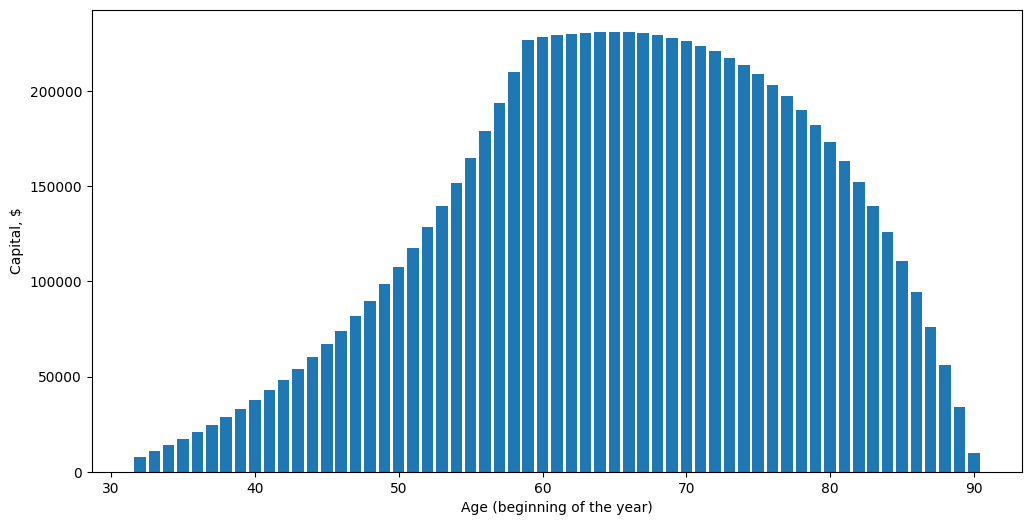

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(x=cl_table['age'], height=cl_table['capital_year_end'])
plt.ylabel("Capital, $")
plt.xlabel("Age (beginning of the year)")
plt.show()